In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False


In [108]:
data={'kor':[80,30,50,70],'eng':[20,90,90,80],
     'math':[33,44,55,66]}  #키값이 리스트인 경우
df =pd.DataFrame(data,index=['aa','bb','cc','dd'])
df

,kor,eng,math
aa,80,20,33
bb,30,90,44
cc,50,90,55
dd,70,80,66


1. 국어, 영어 점수에 대한 바차트를 그리시오

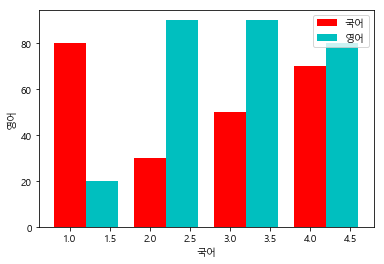

In [16]:
x = pd.Series([1,2,3,4])
plt.bar(x,df['kor'],color='r', width=0.4, label="국어")
plt.bar(x+0.4,df['eng'], color='c', width=0.4,label="영어")
plt.xlabel('국어')
plt.ylabel('영어')
plt.legend(['국어','영어'])
plt.show()


2. 영어, 수학점수에 대한 boxplot 을 그리시오

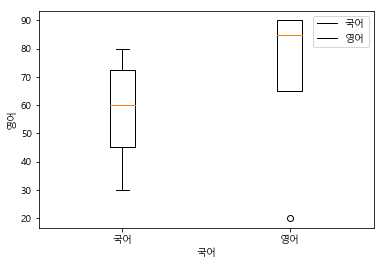

In [38]:
plt.boxplot([df['kor'],df['eng']],labels=['국어','영어'])
plt.xlabel('국어')
plt.ylabel('영어')
plt.legend(['국어','영어'])
plt.show()

3. 이름별 국어점수를 파이차트로 그리시오

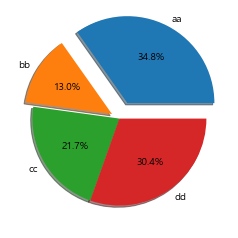

In [44]:
score =df.index
exp = [0.2,0.1,0,0]
plt.pie(df['kor'], labels=score, autopct='%.1f%%', explode=exp, shadow=True)
plt.show()

4. 국어,영어 수학점수를 라인차트로 그리시오

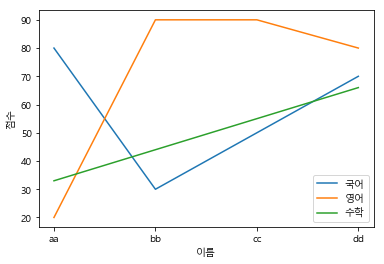

In [55]:
x=df.index
plt.plot(x,df['kor'])
plt.plot(x,df['eng'])
plt.plot(x,df['math'])
plt.xlabel('이름')
plt.ylabel('점수')
plt.legend(['국어','영어','수학'])

5. 수학점수에 대한 scatter를 그리고 점수를 text로 표시하시오

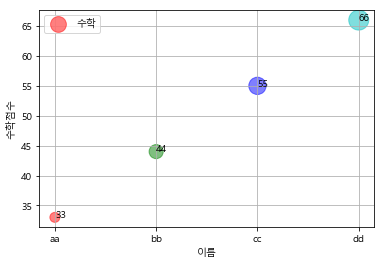

In [70]:
sList = [100,200,300,400]
colors=['r','g','b','c']
plt.scatter(df.index,df['math'], s = sList, c=colors ,alpha=0.5)
plt.xlabel('이름')
plt.ylabel('수학점수')
plt.grid(True)
plt.legend(['수학'])
for x,y in zip( df.index,df['math'] ):
    plt.text(x,y,'%s'%y)

6. 국어,영어,수학점수를 stacked bar로 그리시오(%로 표시할 것)

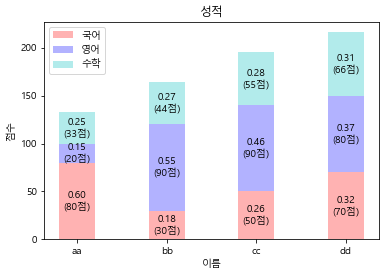

In [83]:
x=df.index
plt.bar(x,df['kor'],color='r',
        width=0.4,
        label='국어',
        alpha = 0.3)

plt.bar(x,df['eng'],color='b',
        width=0.4,
        label='영어', 
        bottom=df['kor'],# 영어 점수를 국어 점수 밑에 깔고 더해라 -> 총점도 잘 보일듯
        alpha = 0.3)
plt.bar(x,df['math'],color='c',
        width=0.4,
        label='수학',
        bottom=df['kor']+df['eng'],
        alpha = 0.3)
for x_,k,e,m in zip(x,df['kor'],df['eng'],df['math']):
    plt.text(x_,k/2,'%.2f\n(%d점)'%((k/(k+e+m)),k),va = 'center', ha = 'center')
    plt.text(x_,e/2+k,'%.2f\n(%d점)'%((e/(k+e+m)),e),va = 'center', ha = 'center')
    plt.text(x_,m/2+k+e,'%.2f\n(%d점)'%((m/(k+e+m),m)),va = 'center', ha = 'center')
plt.xlabel('이름')
plt.ylabel('점수')
plt.title('성적')
plt.legend()

7. biths.txt 데이터의 2000년대 남아 여아 출생현황을 바차트와 라인차트를 같이 표시하시오.
    (plt.xtics(rotation="45")를 적용하여 x축 데이터를 읽기 좋게 할것)

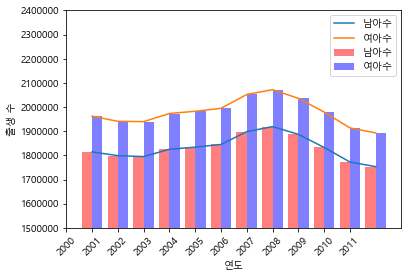

In [104]:
dfb = pd.read_table('births.txt', header=None, sep=',', index_col=0)
dfb.columns = ['남아수', '여아수']
dfb.index.name='년도'
dfb2 = dfb.loc['2000':,]
x =pd.Series(dfb2.index)
plt.xticks(x-1,dfb2.index, rotation='45')
plt.bar(x-0.2,dfb2['남아수'],color='red',width=0.4,alpha=0.5,label='남아수')
plt.bar(x+0.2,dfb2['여아수'],color='blue',width=0.4,alpha=0.5,label='여아수')
plt.plot(x,dfb2['남아수'])
plt.plot(x,dfb2['여아수'])
plt.xlabel('연도')
plt.ylabel('출생 수')
plt.ylim(1500000,2400000)
plt.legend()
plt.show()

8. hotel.xlsx 데이터를 이용하여 호텔별 가격현황을 바차트로 그리시오

In [110]:
df=pd.read_excel('hotel.xlsx')
df

,grade,rate,price
호텔1,10,1,9500
호텔2,8,2,8000
호텔3,6,4,6000
호텔4,9,2,8600
호텔5,7,4,7000
호텔6,8,2,8300
호텔7,5,5,5000
호텔8,5,5,5200
호텔9,8,3,8100
호텔10,10,1,9300


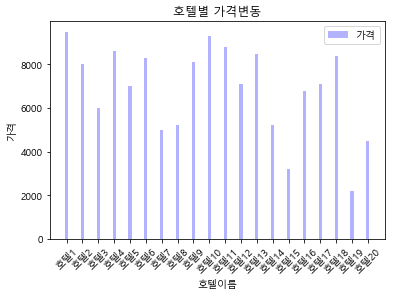

In [111]:
x=df.index
plt.bar(x,df['price'],color='b', width=0.2, label='가격', alpha=0.3)
plt.xlabel('호텔이름')
plt.xticks( rotation='45')
plt.ylabel('가격')
plt.title('호텔별 가격변동')
plt.legend()

9. 국어를 x축으로, 영어를 y축으로 하여 scatter를 그리고 각원에 이름을 표시하시오

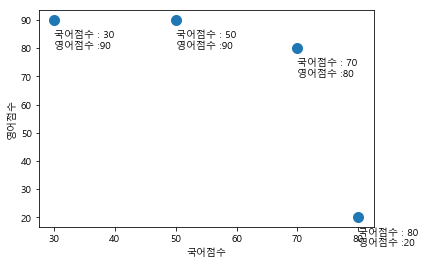

In [95]:
plt.scatter(df['kor'],df['eng'],s=100)
for i in range(len(df['kor'])):
    plt.text(df['kor'][i],df['eng'][i]-10,'국어점수 : %s\n영어점수 :%s'%(df['kor'][i],df['eng'][i]))
plt.xlabel('국어점수')
plt.ylabel('영어점수')
plt.show()